In [1]:
#import the necessary packages
import nltk
from nltk import FreqDist
import csv
import pandas
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load in the data that will be analyzed
data=pandas.read_csv('train.tsv',sep='\t')
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [3]:
#Create a column for phrase length, then select the longest phrase for each sentenceID. This way the original sentence
#will be the one under investigation rather than all the split of sentences.
PhraseLength=[]
for row in data["Phrase"]:
    length=len(row)
    PhraseLength.append(length)
data["PhraseLength"]=PhraseLength
output = data[data['PhraseLength']==data.groupby('SentenceId')['PhraseLength'].transform(max)]
sum(output["Sentiment"]==3)

2325

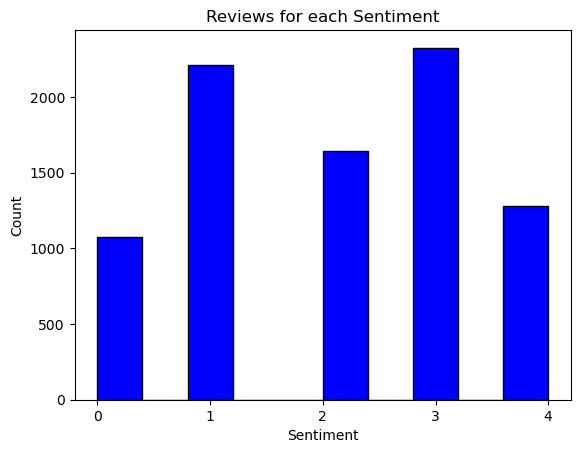

In [4]:
#Visualize the spread of sentiments for the reviews
Sentiments = list(output["Sentiment"])
plt.hist(Sentiments, color ='blue', edgecolor="Black")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Reviews for each Sentiment")
plt.xticks(np.arange(0, 4.5, 1))
plt.show()

In [5]:
#The total reviews that will be investigated
len(output)

8530

In [6]:
#long list of all full phrase strings
for row in output:
    Phraselist=list(output["Phrase"])

In [7]:
#This is a function that will filter the reviews and get rid of all characters that are not alphabetical numbers
#which essentially just means this is a punctuation filter.
def alpha_filter(w):
  # pattern to match word of non-alphabetical characters
  pattern = re.compile('^[^a-z]+$')
  if (pattern.match(w)):
    return True
  else:
    return False

In [8]:
#Base function that will create word features for use in Naive-Bayes. This functinon will tokenize the words in a
#string and make a dictionary where the word is the key and TRUE is the value.
def create_word_features(words):
    my_dict = dict([(word, True) for word in words])
    return my_dict

In [9]:
#Example of the word feature function when no filtering is done. Notice punctuation, capitalization, and stop
#words are not filter from the example sentence.
create_word_features(["the", "quick", "Brown", "quick", "a", "fox", "."])

{'the': True, 'quick': True, 'Brown': True, 'a': True, 'fox': True, '.': True}

In [10]:
output = data[data['PhraseLength']==data.groupby('SentenceId')['PhraseLength'].transform(max)]
Sent0=output[output["Sentiment"]==0]
Sent1=output[output["Sentiment"]==1]
Sent2=output[output["Sentiment"]==2]
Sent3=output[output["Sentiment"]==3]
Sent4=output[output["Sentiment"]==4]
for row in Sent0:
    Phraselist0=list(Sent0["Phrase"])
for row in Sent1:
    Phraselist1=list(Sent1["Phrase"])
for row in Sent2:
    Phraselist2=list(Sent2["Phrase"])
for row in Sent3:
    Phraselist3=list(Sent3["Phrase"])
for row in Sent4:
    Phraselist4=list(Sent4["Phrase"])

In [25]:
#Using the baseline word feature to create lists for each sentiment, however the list will be a list of tuples where
#one part of the list is a dictionary with the word:True as seen above and the second part of the tuple will be
#the sentiment number it was rated as
Sent0 = []
for review in Phraselist0:
    words=review.split()
    Sent0.append((create_word_features(words), "0"))
    
Sent1 = []
for review in Phraselist1:
    words=review.split()
    Sent1.append((create_word_features(words), "1"))
    
Sent2 = []
for review in Phraselist2:
    words=review.split()
    Sent2.append((create_word_features(words), "2"))
    
Sent3 = []
for review in Phraselist3:
    words=review.split()
    Sent3.append((create_word_features(words), "3"))
    
Sent4 = []
for review in Phraselist4:
    words=review.split()
    Sent4.append((create_word_features(words), "4"))

In [26]:
#The lists of tuples are combined to one long list and shuffled randomly. It is then sampled into training and testing
#Sets, the combined set has a length of 8530, so using the first 7000 is roughly a 14:3 split or roughly 80/20
NBset=Sent0+Sent1+Sent2+Sent3+Sent4
random.shuffle(NBset)
print(len(NBset))
training=NBset[:7000]
testing=NBset[7000:]

8530


In [27]:
#A classifier is created on the training data using Naive Bayes. The model is then applied to the testing set
#and compared to the true values of the testing set. This gave an accuracy of 33.87%, however this will change
#each time it is run. So anywhere from around 30-35% accuracy is expected.
classifier = NaiveBayesClassifier.train(training)
accuracy = nltk.classify.util.accuracy(classifier, testing)
print(accuracy * 100)

38.43137254901961


In [14]:
#This is the same word feature function from before, however this time stop words are removed. Various punctuation
#is removed, and all words are made lowercase.
def create_word_features_filtered(words):
    stopwords1=nltk.corpus.stopwords.words('english')
    s=['\'s', '.', ',']
    newwords=[x.lower() for x in words]
    stopwords=stopwords1+s
    useful_words = [word for word in newwords if word not in stopwords]
    my_dict = dict([(word, True) for word in useful_words])
    return my_dict

In [15]:
#Example of the filter in action, the Brown is made lowerase, the punctuation is removed and so are the stopwords
create_word_features_filtered(["the", "quick", "Brown", "quick", "a", "fox", "."])

{'quick': True, 'brown': True, 'fox': True}

In [19]:
#Recreating the same list as before, with the tuple of a dictionary and the corresponding sentiment however
#this time the new function with more filtering was done.
Sent0 = []
for review in Phraselist0:
    words=review.split()
    Sent0.append((create_word_features_filtered(words), 0))
    
Sent1 = []
for review in Phraselist1:
    words=review.split()
    Sent1.append((create_word_features_filtered(words), 1))
    
Sent2 = []
for review in Phraselist2:
    words=review.split()
    Sent2.append((create_word_features_filtered(words), 2))
    
Sent3 = []
for review in Phraselist3:
    words=review.split()
    Sent3.append((create_word_features_filtered(words), 3))
    
Sent4 = []
for review in Phraselist4:
    words=review.split()
    Sent4.append((create_word_features_filtered(words), 4))
    
NBset=Sent0+Sent1+Sent2+Sent3+Sent4
random.shuffle(NBset)
len(NBset)
training=NBset[:7000]
testing=NBset[7000:]

In [20]:
#The same Naive Bayes classifier was used and the accuracy was found to be 34.71%, slightly better however note
#that this will fluctuate.
classifier = NaiveBayesClassifier.train(training)
accuracy = nltk.classify.util.accuracy(classifier, testing)
print(accuracy * 100)

35.55555555555556


In [27]:
#Showing which features of classifier are most informative
print(classifier.show_most_informative_features(30))

Most Informative Features
                   worst = True                0 : 3      =     18.0 : 1.0
                     bad = True                0 : 4      =     16.7 : 1.0
                       ? = True                2 : 4      =     15.9 : 1.0
                  moving = True                4 : 0      =     15.7 : 1.0
                    dull = True                0 : 3      =     15.3 : 1.0
                 imagine = True                0 : 3      =     15.3 : 1.0
            entertaining = True                4 : 0      =     15.2 : 1.0
                  stupid = True                0 : 2      =     14.1 : 1.0
                    mess = True                0 : 4      =     14.1 : 1.0
                    loud = True                0 : 3      =     13.9 : 1.0
              thoughtful = True                4 : 1      =     13.1 : 1.0
                touching = True                4 : 1      =     13.1 : 1.0
                    best = True                4 : 0      =     12.9 : 1.0

In [29]:
#Using only the top 2000 most frequently occuring words to train (experiment 2)
#This time the most frequent 2000 words were collected.
Phraselist
biglist=" ".join(Phraselist)
fdist = FreqDist(word.lower() for word in word_tokenize(biglist))
frequentwords=fdist.most_common(2000)
word_features = [word for (word, freq) in frequentwords]

In [30]:
#A new function will create a features output with V_word where word is a word in the most frequent 2000 words.
#It will be marked true if it appears in the review and it will be marked false if it does not. Again the associated
#sentiment will paired with these long dictionaries. Most V_word will be false as the reviews are short.
def document_features(document, word_features):
	document_words = set(document)
	features = {}
	for word in word_features:
		features['V_%s' % word] = (word in document_words)
	return features

In [31]:
#This simply creates a list of tuples, where the tuple is the tokenized phrase in a list and the sentiment. The list
#of tuples is then shuffled so training and testing data can be pulled.
phrasesent=list(zip(output.Phrase,output.Sentiment))
phrasesent[0]
tuples=[]
somelist=[]
hello=[]
for review in phrasesent:
    somelist=(review[0].split(), review[1])
    hello=tuple(somelist)
    tuples.append(hello)
random.shuffle(tuples)
print(tuples[0])

(['Nothing', 'about', 'the', 'film', '--', 'with', 'the', 'possible', 'exception', 'of', 'Elizabeth', 'Hurley', "'s", 'breasts', '--', 'is', 'authentic', '.'], 0)


In [32]:
#The featureset are again 8530 long so this will need to be split
featuresets = [(document_features(d, word_features), c) for (d,c) in tuples]
len(featuresets)

8530

In [33]:
#This time significantly more training data (over 8000) will be used and tested on much less testing data (500)
#Again naive bayes is used and compared to the true values. It returned an accuarcy of 36.4%
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print (nltk.classify.accuracy(classifier, test_set))

0.39


In [34]:
#A visual of the most defining features
print(classifier.show_most_informative_features(30))

Most Informative Features
                   V_bad = True                0 : 4      =     25.2 : 1.0
                  V_dull = True                0 : 3      =     19.2 : 1.0
                 V_worst = True                0 : 3      =     19.2 : 1.0
                     V_? = True                2 : 4      =     17.4 : 1.0
            V_thoughtful = True                4 : 1      =     16.7 : 1.0
              V_touching = True                4 : 1      =     16.7 : 1.0
                V_moving = True                4 : 0      =     15.0 : 1.0
                  V_mess = True                0 : 4      =     14.6 : 1.0
                  V_best = True                4 : 0      =     14.2 : 1.0
                 V_worse = True                0 : 3      =     13.5 : 1.0
                 V_heart = True                4 : 0      =     13.3 : 1.0
             V_hilarious = True                4 : 1      =     13.2 : 1.0
                  V_flat = True                1 : 3      =     12.9 : 1.0

In [35]:
#Using the top 4000 words
biglist=" ".join(Phraselist)
fdist = FreqDist(word.lower() for word in word_tokenize(biglist))
frequentwords=fdist.most_common(4000)
word_features = [word for (word, freq) in frequentwords]
phrasesent=list(zip(output.Phrase,output.Sentiment))
tuples=[]
somelist=[]
hello=[]
for review in phrasesent:
    somelist=(review[0].split(), review[1])
    hello=tuple(somelist)
    tuples.append(hello)
random.shuffle(tuples)
featuresets = [(document_features(d, word_features), c) for (d,c) in tuples]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print (nltk.classify.accuracy(classifier, test_set))

0.362


In [36]:
print(classifier.show_most_informative_features(30))

Most Informative Features
                   V_bad = True                0 : 4      =     26.4 : 1.0
                 V_worst = True                0 : 3      =     20.1 : 1.0
                     V_? = True                2 : 4      =     17.6 : 1.0
            V_thoughtful = True                4 : 1      =     16.6 : 1.0
             V_wonderful = True                4 : 1      =     16.6 : 1.0
                  V_dull = True                0 : 3      =     15.6 : 1.0
                V_moving = True                4 : 0      =     15.4 : 1.0
                  V_best = True                4 : 0      =     14.5 : 1.0
              V_touching = True                4 : 1      =     14.4 : 1.0
                 V_heart = True                4 : 0      =     14.3 : 1.0
                  V_flat = True                1 : 3      =     13.6 : 1.0
             V_contrived = True                0 : 3      =     13.6 : 1.0
                 V_worse = True                0 : 3      =     13.6 : 1.0

In [37]:
#negation words
negationwords = ['no', 'not', 'never', 'none', 'nowhere', 'nothing', 'noone','rather', 'hardly', 'scarcely', 'rarely', 'seldom', 'neither', 'nor']

In [38]:
#This is a function that will include negation words into the formula. Instead of having "nothing good" being split
#into "nothing" "good" and potentially missing the negation importance of the words "nothing" this function will
#Add V_NOT_word to the feature set if it sees it appear in the reviews. 
def NOT_features(document, word_features, negationwords):
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = False
        features['V_NOT{}'.format(word)] = False
    # go through document words in order
    for i in range(0, len(document)):
        word = document[i]
        if ((i + 1) < len(document)) and ((word in negationwords) or (word.endswith("n't"))):
            i += 1
            features['V_NOT{}'.format(document[i])] = (document[i] in word_features)
        else:
            features['V_{}'.format(word)] = (word in word_features)
    return features

In [39]:
#An example of this in action, this will read the reviews in and tell if not good appears in the first review
#Also note that NOT_featuresets is created which is a featureset however, the negation will be accounted for
#because of the function described above.
NOT_featuresets = [(NOT_features(d, word_features, negationwords), c) for (d, c) in tuples]
# show the values of a couple of example features
print(NOT_featuresets[0][0]['V_NOTgood'])
print(NOT_featuresets[0][0]['V_always'])

False
False


In [40]:
#Training and testing sets created from the negation featureset. The accuracy was found to be 39.2% which is an
#increase. Note that more data was used for testing and less for training than before and the accuracy will fluctuate.
train_set, test_set = NOT_featuresets[1000:], NOT_featuresets[:1000]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.371

In [41]:
#Again showing the most influential words
classifier.show_most_informative_features(30)

Most Informative Features
                   V_bad = True                0 : 4      =     25.3 : 1.0
                  V_best = True                4 : 0      =     19.4 : 1.0
                 V_worst = True                0 : 3      =     19.1 : 1.0
                     V_? = True                2 : 4      =     17.4 : 1.0
             V_wonderful = True                4 : 1      =     16.6 : 1.0
                V_always = True                4 : 1      =     15.5 : 1.0
             V_beautiful = True                4 : 1      =     15.5 : 1.0
                V_moving = True                4 : 0      =     14.9 : 1.0
                  V_dull = True                0 : 3      =     14.9 : 1.0
                 V_heart = True                4 : 0      =     14.4 : 1.0
            V_thoughtful = True                4 : 1      =     14.3 : 1.0
                  V_flat = True                1 : 3      =     13.6 : 1.0
                 V_worse = True                0 : 3      =     13.5 : 1.0

In [42]:
#cross validation formula, this will take the featureset (reviews and accompoanying sentiment) and apply the testing, 
#training, and classifying and repeat the process for the amount of folds you give it.
def cross_validation_accuracy(num_folds, featuresets):
    subset_size = int(len(featuresets)/num_folds)
    print('Each fold size:', subset_size)
    accuracy_list = []
    # iterate over the folds
    for i in range(num_folds):
        test_this_round = featuresets[(i*subset_size):][:subset_size]
        train_this_round = featuresets[:(i*subset_size)] + featuresets[((i+1)*subset_size):]
        # train using train_this_round
        classifier = nltk.NaiveBayesClassifier.train(train_this_round)
        # evaluate against test_this_round and save accuracy
        accuracy_this_round = nltk.classify.accuracy(classifier, test_this_round)
        print (i, accuracy_this_round)
        accuracy_list.append(accuracy_this_round)
    # find mean accuracy over all rounds
    print ('mean accuracy', sum(accuracy_list) / num_folds)

In [43]:
cross_validation_accuracy(5, featuresets)

Each fold size: 1706
0 0.37807737397420865
1 0.38452520515826494
2 0.3862837045720985
3 0.37807737397420865
4 0.35873388042203985
mean accuracy 0.3771395076201641


In [44]:
#This will help build the confusion matrix, comparing the predicted values with the trust values.
#An example is shown
goldlist = []
predictedlist = []
for (features, label) in test_set:
    	goldlist.append(label)
    	predictedlist.append(classifier.classify(features))
cm = nltk.ConfusionMatrix(goldlist, predictedlist)
print(cm.pretty_format(sort_by_count=True, truncate=9))

  |   3   1   2   4   0 |
--+---------------------+
3 |<108> 40  54  61  29 |
1 |  42<106> 66  11  42 |
2 |  46  45 <51> 17  14 |
4 |  51  12  18 <65>  4 |
0 |   7  45  22   3 <41>|
--+---------------------+
(row = reference; col = test)



In [45]:
#Additionally, this can be made prettier with this code
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

  |      3      1      2      4      0 |
--+------------------------------------+
3 | <10.8%>  4.0%   5.4%   6.1%   2.9% |
1 |   4.2% <10.6%>  6.6%   1.1%   4.2% |
2 |   4.6%   4.5%  <5.1%>  1.7%   1.4% |
4 |   5.1%   1.2%   1.8%  <6.5%>  0.4% |
0 |   0.7%   4.5%   2.2%   0.3%  <4.1%>|
--+------------------------------------+
(row = reference; col = test)



In [46]:
# Function to compute precision, recall and F1 for each label
#  and for any number of labels
# Input: list of gold labels, list of predicted labels (in same order)
# Output:  prints precision, recall and F1 for each label
def eval_measures(gold, predicted):
    # get a list of labels
    labels = list(set(gold))
    # these lists have values for each label 
    recall_list = []
    precision_list = []
    F1_list = []
    for lab in labels:
        # for each label, compare gold and predicted lists and compute values
        TP = FP = FN = TN = 0
        for i, val in enumerate(gold):
            if val == lab and predicted[i] == lab:  TP += 1
            if val == lab and predicted[i] != lab:  FN += 1
            if val != lab and predicted[i] == lab:  FP += 1
            if val != lab and predicted[i] != lab:  TN += 1
        # use these to compute recall, precision, F1
        recall = TP / (TP + FP)
        precision = TP / (TP + FN)
        recall_list.append(recall)
        precision_list.append(precision)
        F1_list.append( 2 * (recall * precision) / (recall + precision))

    # the evaluation measures in a table with one row per label
    print('\tPrecision\tRecall\t\tF1')
    # print measures for each label
    for i, lab in enumerate(labels):
        print(lab, '\t', "{:10.3f}".format(precision_list[i]), \
          "{:10.3f}".format(recall_list[i]), "{:10.3f}".format(F1_list[i]))

In [47]:
eval_measures(goldlist, predictedlist)

	Precision	Recall		F1
0 	      0.347      0.315      0.331
1 	      0.397      0.427      0.412
2 	      0.295      0.242      0.266
3 	      0.370      0.425      0.396
4 	      0.433      0.414      0.423


In [48]:
#Default starting point. No filtering, no negation. Using all the tools created up to this point a baseline
#accuracy using no filtering was created, cross validated, and shown with a confusion matrix. This is the
#default classification and will be used to compare the experiments to.
#Using only the top 2000 most frequently occuring words to train (experiment 2)
def document_features(document, word_features):
	document_words = set(document)
	features = {}
	for word in word_features:
		features['V_%s' % word] = (word in document_words)
	return features
biglist=" ".join(Phraselist)
fdist = FreqDist(word.lower() for word in word_tokenize(biglist))
frequentwords=fdist.most_common(2000)
word_features = [word for (word, freq) in frequentwords]
phrasesent=list(zip(output.Phrase,output.Sentiment))
phrasesent[0]
tuples=[]
somelist=[]
hello=[]
for review in phrasesent:
    somelist=(review[0].split(), review[1])
    hello=tuple(somelist)
    tuples.append(hello)
random.shuffle(tuples)
featuresets = [(document_features(d, word_features), c) for (d,c) in tuples]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print (nltk.classify.accuracy(classifier, test_set))
print(classifier.show_most_informative_features(30))

def cross_validation_accuracy(num_folds, featuresets):
    subset_size = int(len(featuresets)/num_folds)
    print('Each fold size:', subset_size)
    accuracy_list = []
    # iterate over the folds
    for i in range(num_folds):
        test_this_round = featuresets[(i*subset_size):][:subset_size]
        train_this_round = featuresets[:(i*subset_size)] + featuresets[((i+1)*subset_size):]
        # train using train_this_round
        classifier = nltk.NaiveBayesClassifier.train(train_this_round)
        # evaluate against test_this_round and save accuracy
        accuracy_this_round = nltk.classify.accuracy(classifier, test_this_round)
        print (i, accuracy_this_round)
        accuracy_list.append(accuracy_this_round)
    # find mean accuracy over all rounds
    print ('mean accuracy', sum(accuracy_list) / num_folds)
    
cross_validation_accuracy(5, featuresets)
goldlist = []
predictedlist = []
for (features, label) in test_set:
    	goldlist.append(label)
    	predictedlist.append(classifier.classify(features))
        
cm = nltk.ConfusionMatrix(goldlist, predictedlist)
def eval_measures(gold, predicted):
    # get a list of labels
    labels = list(set(gold))
    # these lists have values for each label 
    recall_list = []
    precision_list = []
    F1_list = []
    for lab in labels:
        # for each label, compare gold and predicted lists and compute values
        TP = FP = FN = TN = 0
        for i, val in enumerate(gold):
            if val == lab and predicted[i] == lab:  TP += 1
            if val == lab and predicted[i] != lab:  FN += 1
            if val != lab and predicted[i] == lab:  FP += 1
            if val != lab and predicted[i] != lab:  TN += 1
        # use these to compute recall, precision, F1
        recall = TP / (TP + FP)
        precision = TP / (TP + FN)
        recall_list.append(recall)
        precision_list.append(precision)
        F1_list.append( 2 * (recall * precision) / (recall + precision))

    # the evaluation measures in a table with one row per label
    print('\tPrecision\tRecall\t\tF1')
    # print measures for each label
    for i, lab in enumerate(labels):
        print(lab, '\t', "{:10.3f}".format(precision_list[i]), \
          "{:10.3f}".format(recall_list[i]), "{:10.3f}".format(F1_list[i]))
eval_measures(goldlist, predictedlist)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

0.368
Most Informative Features
                   V_bad = True                0 : 4      =     24.7 : 1.0
               V_minutes = True                0 : 4      =     21.2 : 1.0
                 V_worst = True                0 : 3      =     18.8 : 1.0
             V_wonderful = True                4 : 1      =     17.8 : 1.0
                     V_? = True                2 : 4      =     17.7 : 1.0
              V_touching = True                4 : 1      =     16.6 : 1.0
            V_thoughtful = True                4 : 1      =     15.5 : 1.0
                V_moving = True                4 : 0      =     14.7 : 1.0
                  V_dull = True                0 : 3      =     14.7 : 1.0
                  V_best = True                4 : 0      =     14.6 : 1.0
                 V_worse = True                0 : 3      =     13.8 : 1.0
                 V_heart = True                4 : 0      =     13.6 : 1.0
                  V_mess = True                0 : 4      =     13.2

In [49]:
#Exact same except using the most common 4000 words instead of 2000
biglist=" ".join(Phraselist)
fdist = FreqDist(word.lower() for word in word_tokenize(biglist))
frequentwords=fdist.most_common(4000)
word_features = [word for (word, freq) in frequentwords]
phrasesent=list(zip(output.Phrase,output.Sentiment))
phrasesent[0]
tuples=[]
somelist=[]
hello=[]
for review in phrasesent:
    somelist=(review[0].split(), review[1])
    hello=tuple(somelist)
    tuples.append(hello)
random.shuffle(tuples)
featuresets = [(document_features(d, word_features), c) for (d,c) in tuples]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print (nltk.classify.accuracy(classifier, test_set))
print(classifier.show_most_informative_features(30))
cross_validation_accuracy(5, featuresets)
goldlist = []
predictedlist = []
for (features, label) in test_set:
    	goldlist.append(label)
    	predictedlist.append(classifier.classify(features))
        
cm = nltk.ConfusionMatrix(goldlist, predictedlist)
eval_measures(goldlist, predictedlist)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

0.372
Most Informative Features
                   V_bad = True                0 : 4      =     43.3 : 1.0
                     V_? = True                2 : 4      =     30.4 : 1.0
                 V_worst = True                0 : 3      =     20.4 : 1.0
             V_wonderful = True                4 : 1      =     16.7 : 1.0
            V_thoughtful = True                4 : 1      =     15.5 : 1.0
                  V_dull = True                0 : 3      =     14.6 : 1.0
                  V_best = True                4 : 0      =     14.5 : 1.0
             V_contrived = True                0 : 3      =     13.7 : 1.0
                  V_less = True                1 : 4      =     12.9 : 1.0
                V_stupid = True                0 : 2      =     12.7 : 1.0
                 V_heart = True                4 : 0      =     12.6 : 1.0
                  V_flat = True                1 : 3      =     12.3 : 1.0
                 V_awful = True                0 : 3      =     12.3

In [50]:
#using negation words in the word_features
biglist=" ".join(Phraselist)
fdist = FreqDist(word.lower() for word in word_tokenize(biglist))
frequentwords=fdist.most_common(2000)
word_features = [word for (word, freq) in frequentwords]
import re
negationwords = ["can't", "wasn't" 'no', 'not', 'never', 'none', 'nowhere', 
                 'nothing', 'noone', 'rather', 'hardly', 'scarcely', 'rarely', 
                 'seldom', 'neither', 'nor']
def NOT_features(document, word_features, negationwords):
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = False
        features['V_NOT{}'.format(word)] = False
    # go through document words in order
    for i in range(0, len(document)):
        word = document[i]
        if ((i + 1) < len(document)) and ((word in negationwords) or (word.endswith("n't"))):
            i += 1
            features['V_NOT{}'.format(document[i])] = (document[i] in word_features)
        else:
            features['V_{}'.format(word)] = (word in word_features)
    return features

NOT_featuresets = [(NOT_features(d, word_features, negationwords), c) for (d, c) in tuples]
train_set, test_set = NOT_featuresets[1000:], NOT_featuresets[:1000]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(30)
cross_validation_accuracy(5, NOT_featuresets)
goldlist = []
predictedlist = []
for (features, label) in test_set:
    	goldlist.append(label)
    	predictedlist.append(classifier.classify(features))
        
cm = nltk.ConfusionMatrix(goldlist, predictedlist)
eval_measures(goldlist, predictedlist)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

0.378
Most Informative Features
                   V_bad = True                0 : 4      =     39.7 : 1.0
                     V_? = True                2 : 4      =     28.1 : 1.0
                 V_worst = True                0 : 3      =     20.0 : 1.0
             V_wonderful = True                4 : 1      =     16.5 : 1.0
             V_beautiful = True                4 : 1      =     14.2 : 1.0
            V_thoughtful = True                4 : 1      =     14.2 : 1.0
                  V_best = True                4 : 0      =     13.9 : 1.0
                  V_dull = True                0 : 3      =     13.7 : 1.0
                V_stupid = True                0 : 2      =     12.7 : 1.0
                  V_less = True                1 : 4      =     12.3 : 1.0
                 V_heart = True                4 : 0      =     12.1 : 1.0
                 V_awful = True                0 : 3      =     12.0 : 1.0
             V_contrived = True                0 : 3      =     12.0

In [51]:
#Going to try bigrams now, the 10,000 most frequent bigrams were collected and will be used with the below function
from nltk.collocations import *
from nltk.corpus import sentence_polarity
biglist=" ".join(Phraselist)
fdist = FreqDist(word.lower() for word in word_tokenize(biglist))
frequentwords=fdist.most_common(4000)
word_features = [word for (word, freq) in frequentwords]
bigram_measures = nltk.collocations.BigramAssocMeasures()
all_words_list = [word for (sent,cat) in tuples for word in sent]
finder = BigramCollocationFinder.from_words(all_words_list)
bigram_features = finder.nbest(bigram_measures.chi_sq, 10000)

In [52]:
#Bigram function that makes a feature set with both the words in the featurewords set and with the bigrams from above.
def bigram_document_features(document, word_features, bigram_features):
    document_words = set(document)
    document_bigrams = nltk.bigrams(document)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    for bigram in bigram_features:
        features['B_{}_{}'.format(bigram[0], bigram[1])] = (bigram in document_bigrams)    
    return features

In [53]:
# Bigram Accuracy. This was done using the tools from before, however this time the featureset includes the bigrams
bigram_featuresets = [(bigram_document_features(d, word_features, bigram_features), c) for (d, c) in tuples]
train_set, test_set = bigram_featuresets[1000:], bigram_featuresets[:1000]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(30)
cross_validation_accuracy(5, featuresets)
goldlist = []
predictedlist = []
for (features, label) in test_set:
    	goldlist.append(label)
    	predictedlist.append(classifier.classify(features))
        
cm = nltk.ConfusionMatrix(goldlist, predictedlist)
eval_measures(goldlist, predictedlist)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

0.382
Most Informative Features
                   V_bad = True                0 : 4      =     39.7 : 1.0
                     V_? = True                2 : 4      =     28.1 : 1.0
                 V_worst = True                0 : 3      =     20.0 : 1.0
             V_wonderful = True                4 : 1      =     16.5 : 1.0
             V_beautiful = True                4 : 1      =     14.2 : 1.0
            V_thoughtful = True                4 : 1      =     14.2 : 1.0
                  V_best = True                4 : 0      =     13.9 : 1.0
                  V_dull = True                0 : 3      =     13.7 : 1.0
                V_stupid = True                0 : 2      =     12.7 : 1.0
                  V_less = True                1 : 4      =     12.3 : 1.0
                 V_heart = True                4 : 0      =     12.1 : 1.0
                 V_awful = True                0 : 3      =     12.0 : 1.0
             V_contrived = True                0 : 3      =     12.0

In [54]:
#Import the necessary SKLearn packages for SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

In [56]:
#Randomize and pull training and testing phrases with their accompanying sentiments
randomizedoutput=output
training=randomizedoutput[:7000]
testing=randomizedoutput[7000:]
train_vectors = vectorizer.fit_transform(training["Phrase"])
test_vectors = vectorizer.transform(testing["Phrase"])

In [57]:
#An svm was fun (linear) on the training data. The precision for each sentiment guess is also included
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, training['Sentiment'])
prediction_linear = classifier_linear.predict(test_vectors)
# results
report = classification_report(testing['Sentiment'], prediction_linear, output_dict=True)
print('0: ', report['0'])
print('1: ', report['1'])
print('2: ', report['2'])
print('3: ', report['3'])
print('4: ', report['4'])

0:  {'precision': 0.4065934065934066, 'recall': 0.19072164948453607, 'f1-score': 0.2596491228070175, 'support': 194}
1:  {'precision': 0.40794223826714804, 'recall': 0.578005115089514, 'f1-score': 0.47830687830687835, 'support': 391}
2:  {'precision': 0.28879310344827586, 'recall': 0.22866894197952217, 'f1-score': 0.2552380952380952, 'support': 293}
3:  {'precision': 0.43100189035916825, 'recall': 0.5428571428571428, 'f1-score': 0.4805057955742887, 'support': 420}
4:  {'precision': 0.5161290322580645, 'recall': 0.27586206896551724, 'f1-score': 0.3595505617977528, 'support': 232}


In [58]:
len(prediction_linear)
testing["Sentiment"]

130213    3
130217    3
130229    0
130240    2
130245    3
         ..
155984    2
155997    2
156021    1
156031    1
156039    2
Name: Sentiment, Length: 1530, dtype: int64

In [59]:
#Plugging in the above functions to create a confusion matrix and cross validation for the SVM predicted sentiments
cm = nltk.ConfusionMatrix(testing["Sentiment"], prediction_linear)
eval_measures(testing["Sentiment"], prediction_linear)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=5))

	Precision	Recall		F1
0 	      0.191      0.407      0.260
1 	      0.578      0.408      0.478
2 	      0.229      0.289      0.255
3 	      0.543      0.431      0.481
4 	      0.276      0.516      0.360
  |      3      1      2      4      0 |
--+------------------------------------+
3 | <14.9%>  5.5%   3.9%   2.7%   0.5% |
1 |   4.2% <14.8%>  4.1%   0.4%   2.1% |
2 |   5.5%   7.8%  <4.4%>  0.6%   0.8% |
4 |   7.7%   1.6%   1.5%  <4.2%>  0.1% |
0 |   2.2%   6.5%   1.3%   0.3%  <2.4%>|
--+------------------------------------+
(row = reference; col = test)



ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (2).

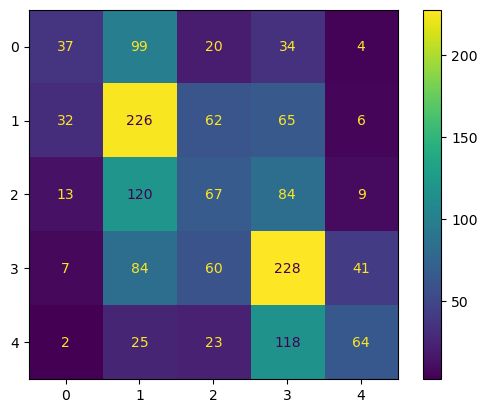

In [60]:
#Finally, plotting the resuling SVM results using matplotlib
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(testing["Sentiment"], prediction_linear)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [61]:
#SVM model accuracy
Accuracy = metrics.accuracy_score(testing["Sentiment"], prediction_linear)
Accuracy

0.4065359477124183